<center>
    
# Maestría en Inteligencia de Negocios
    
## Seminario de programación

## David Cruz & Miguel Angel Gomez Ardila 

## Colombia - 2021
</center>

## Hipótesis

 ¿Cuáles son las ramas que tienen contratos firmados por mayor valor para las ciudades del departamento  meta y cómo es su comportamiento a través de los años según SECOP II?

## Resumen

El siguiente informe tiene como objetivo hacer un análisis exploratorio de los datos extraídos de la plataforma SECOP II acerca de los contratos de los últimos años para las ciudades del departamento del Meta, con el fin de responder la pregunta planteada en la hipótesis "¿Cuáles son las ramas que tienen contratos por mayor valor para las ciudades del departamento meta y cómo es su comportamiento a través de los años según SECOP II?". Para cumplir con el objetivo del informe se siguió un flujo de trabajo que consiste en primero extraer, ordenar y limpiar los datos para eliminar los datos nulos. Segundo se crea un dataframe con los tipos de datos correctos y se generan diferentes graficas como: torta, barras, series de tiempo, histogramas. lo cual permite hacer un análisis bastante completo de los contratos en las diferentes ciudades del departamento del meta por cada una de las ramas, en donde se destaca la ciudad de Villavicencio y la rama ejecutiva como las que predominan en la contratación electrónica del departamento del meta, tanto en valor de los contratos como en cantidad de contratos firmados.

## Introducción

El SECOP II es una plataforma transaccional que permite a Compradores y Proveedores realizar el Proceso de Contratación en línea. Desde su cuenta, las Entidades Estatales (Compradores) pueden crear y adjudicar Procesos de Contratación, registrar y hacer seguimiento a la ejecución contractual. En este informe se hará un análisis de los contratos electrónicos en las ciudades del departamento del meta. 
<br>
<br>
Los contratos electrónicos son acuerdos de voluntades celebrados a través de medios electrónicos por los cuales las partes establecen de forma volitiva obligaciones exigibles, cabe resaltar que estos contratos son contratos tradicionales celebrados a través de medios electrónicos.

#### Palabras clave
Dataframe, analisis exploratorio, SECOP II, contratos electronicos, pandas.

## carga de datos 
A continuación, se fija la clave de acceso a la cuenta de datos abiertos 

In [1]:
passwordm= 'Miguel23'

El siguiente código fue extraído de la pagina de datos abiertos: https://dev.socrata.com/foundry/www.datos.gov.co/jbjy-vk9h en la seccion Code Snipppets – Python pandas, en donde se debe especificar la clave, usuario,  token y limite de datos que se van a cargar a nuestro dataframe de Python pandas.

In [29]:
import pandas as pd
from sodapy import Socrata
import seaborn as sns
import matplotlib.pyplot as plt



# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("www.datos.gov.co", None)

#Example authenticated client (needed for non-public datasets):
client = Socrata('www.datos.gov.co',
                  'S7R2pUxW65D1NrfXZqLvuCJkS',
                  username="miguelmag1500@gmail.com",
                  password="Miguel123")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("jbjy-vk9h", limit=150000)

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

A continuación, se hace un filtrado de los datos del dataframe pertenecientes al departamento del meta.

In [3]:
meta_ciudad = results_df[results_df['departamento'] =='Meta']

In [4]:
print("Tabla 1")
meta_ciudad

Tabla 1


,nombre_entidad,nit_entidad,departamento,ciudad,localizaci_n,orden,sector,rama,entidad_centralizada,proceso_de_compra,...,sistema_general_de_participaciones,sistema_general_de_regal_as,recursos_propios_alcald_as_gobernaciones_y_resguardos_ind_genas_,recursos_de_credito,recursos_propios,ultima_actualizacion,codigo_entidad,fecha_inicio_liquidacion,fecha_fin_liquidacion,codigo_proveedor
22,DEPARTAMENTO DEL META,8920001488,Meta,Villavicencio,"Colombia, Meta , Villavicencio",Territorial,Servicio Público,Ejecutivo,Descentralizada,CO1.BDOS.2125311,...,0,7700000,0,0,0,2021-12-16T00:00:00.000,700817075,NaN,NaN,714520046
89,COLONIA AGRICOLA ACACIAS,822001371,Meta,No Definido,"Colombia, Meta",Nacional,Ley de Justicia,Ejecutivo,Descentralizada,CO1.BDOS.519806,...,0,0,0,0,0,2019-01-17T00:00:00.000,703704478,NaN,NaN,702393034
161,DEPARTAMENTO DEL META,8920001488,Meta,Villavicencio,"Colombia, Meta , Villavicencio",Territorial,Servicio Público,Ejecutivo,Descentralizada,CO1.BDOS.1477932,...,0,0,14310000,0,0,2021-02-04T00:00:00.000,700817075,NaN,NaN,703955658
204,COLONIA AGRICOLA ACACIAS,822001371,Meta,No Definido,"Colombia, Meta",Nacional,Ley de Justicia,Ejecutivo,Descentralizada,CO1.BDOS.567853,...,0,0,0,0,0,2019-01-19T00:00:00.000,703704478,NaN,NaN,702393034
205,ALCALDIA MUNICIPIO DE VILLAVICENCIO,892099324,Meta,Villavicencio,"Colombia, Meta , Villavicencio",Territorial,No aplica/No pertenece,Ejecutivo,Centralizada,CO1.BDOS.1621711,...,0,0,0,0,0,2021-09-07T00:00:00.000,703915215,2021-09-29 05:00:00,2022-03-30 04:59:00,712298207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149722,REGIONAL DE ASEGURAMIENTO EN SALUD No.7,900407224,Meta,Villavicencio,"Colombia, Meta, Villavicencio",Nacional,defensa,Judicial,Descentralizada,CO1.BDOS.1822045,...,0,0,0,0,0,2021-09-07T00:00:00.000,702313123,2021-11-01 17:00:00,2021-12-31 17:00:00,702794041
149765,COLONIA AGRICOLA ACACIAS,822001371,Meta,No Definido,"Colombia, Meta",Nacional,Ley de Justicia,Ejecutivo,Descentralizada,CO1.BDOS.856644,...,0,0,0,0,0,2020-01-29T00:00:00.000,703704478,NaN,NaN,702393034
149815,AGENCIA PARA LA INFRAESTRUCTURA DEL META,900220547,Meta,Villavicencio,"Colombia, Meta , Villavicencio",Territorial,No aplica/No pertenece,Ejecutivo,Descentralizada,CO1.BDOS.2377427,...,0,0,26726493.13,0,0,2021-11-25T00:00:00.000,706520657,NaN,NaN,715788691
149818,PARQUES NACIONALES NATURALES DE COLOMBIA - DIR...,900382496,Meta,Villavicencio,"Colombia, Meta , Villavicencio",Nacional,Ambiente y Desarrollo Sostenible,Ejecutivo,Centralizada,CO1.BDOS.768568,...,0,0,0,0,0,2021-03-09T00:00:00.000,701222242,2020-01-01 05:00:00,2021-03-09 17:00:00,705390623


### Selección de las variables

Para el responder la pregunta planteada al inicio, se han seleccionado las variables de tipo categórico: ciudad, sector, fecha_de_firma, rama. Por otra parte, se seleccionó la variable de tipo numérico valor de contrato.

In [5]:
df_principal= meta_ciudad.loc[:,['ciudad','sector','fecha_de_firma','rama','valor_del_contrato']]#seleccionando las columnas del data frame meta_ciudad 
#para trabajar 

In [6]:
df_principal.dtypes

ciudad                object
sector                object
fecha_de_firma        object
rama                  object
valor_del_contrato    object
dtype: object

### Limpieza de datos 
<br>
<div style="text-align: justify">Para realizar la limpieza de los datos primero es importante saber si hay datos perdidos, a continuación, se indican los valores perdidos como <code> missing_data</code> de las diferentes variables del dataframe <code>df_principal</code>. Al ejecutar el código se verá como True a los datos perdidos y como False a los datos existentes en cada una de las variables del dataframe. Se encontraron 136 datos faltantes en la variable <code>fecha_de_firma</code>, la única variable que contiene datos faltantes del dataframe principal</div><br />

In [7]:
missing_data_ = df_principal.isnull()
for column in missing_data_.columns.values.tolist():
    print(column)
    print (missing_data_[column].value_counts())
    print("") #espacio

ciudad
False    2291
Name: ciudad, dtype: int64

sector
False    2291
Name: sector, dtype: int64

fecha_de_firma
False    2154
True      137
Name: fecha_de_firma, dtype: int64

rama
False    2291
Name: rama, dtype: int64

valor_del_contrato
False    2291
Name: valor_del_contrato, dtype: int64



En la siguiente línea se hace transforma de formato objeto a formato dataframe el df_principal y se guarda con el nombre df.

In [8]:
df=pd.DataFrame(df_principal)

In [9]:
df

,ciudad,sector,fecha_de_firma,rama,valor_del_contrato
22,Villavicencio,Servicio Público,2021-07-30T08:07:31.000,Ejecutivo,7700000
89,No Definido,Ley de Justicia,2018-09-14T09:09:20.000,Ejecutivo,6000000
161,Villavicencio,Servicio Público,2020-09-30T22:09:03.000,Ejecutivo,14310000
204,No Definido,Ley de Justicia,2018-10-24T00:10:40.000,Ejecutivo,1134500
205,Villavicencio,No aplica/No pertenece,2021-02-26T18:02:14.000,Ejecutivo,110570702
...,...,...,...,...,...
149722,Villavicencio,defensa,2021-04-06T10:04:58.000,Judicial,7000000
149765,No Definido,Ley de Justicia,2019-12-09T15:12:20.000,Ejecutivo,1514480
149815,Villavicencio,No aplica/No pertenece,NaN,Ejecutivo,26726493
149818,Villavicencio,Ambiente y Desarrollo Sostenible,2019-02-28T19:02:32.000,Ejecutivo,15244400


En la siguiente línea de código se eliminan los valores faltantes o nulos de la variable <code>fecha_de_firma</code> del dataframe df que es simplemente el mismo dataframe principal en formato dataframe, lo cual se asigna a la variable <code>df_principal</code> luego de eliminar los valores faltantes.

In [10]:
df.dropna(subset = ["fecha_de_firma"], inplace=True)
df_principal=df

In [11]:
df_principal

,ciudad,sector,fecha_de_firma,rama,valor_del_contrato
22,Villavicencio,Servicio Público,2021-07-30T08:07:31.000,Ejecutivo,7700000
89,No Definido,Ley de Justicia,2018-09-14T09:09:20.000,Ejecutivo,6000000
161,Villavicencio,Servicio Público,2020-09-30T22:09:03.000,Ejecutivo,14310000
204,No Definido,Ley de Justicia,2018-10-24T00:10:40.000,Ejecutivo,1134500
205,Villavicencio,No aplica/No pertenece,2021-02-26T18:02:14.000,Ejecutivo,110570702
...,...,...,...,...,...
149681,Villavicencio,Industria,2021-11-12T16:11:44.000,Ejecutivo,25000000
149722,Villavicencio,defensa,2021-04-06T10:04:58.000,Judicial,7000000
149765,No Definido,Ley de Justicia,2019-12-09T15:12:20.000,Ejecutivo,1514480
149818,Villavicencio,Ambiente y Desarrollo Sostenible,2019-02-28T19:02:32.000,Ejecutivo,15244400


En la siguiente línea se revisan los diferentes tipos de variables pertenecientes al dataframe principal 

In [12]:
df_principal.dtypes

ciudad                object
sector                object
fecha_de_firma        object
rama                  object
valor_del_contrato    object
dtype: object

Al revisar los tipos de variable se identificó que todas eran de tipo objeto, por ende, es necesario hacer un cambio de formato a entero (int) en la variable <code>valor_del_contrato</code> y convertir a formato fecha (datretime) la variable <code>fecha_de_firma</code>.

In [13]:
df_principal["valor_del_contrato"]=pd.to_numeric(df_principal["valor_del_contrato"], errors='coerce')
df_principal["fecha_de_firma"]=pd.to_datetime(df_principal['fecha_de_firma'], format='%Y-%m-%d')

### Análisis exploratorio (EDA)

- resumir las principales características de los datos - obtener una mejor comprensión del conjunto de datos.
- descubrir relaciones entre diferentes variables, y
- extraer variables importantes para el problema que estamos tratando de resolver.

In [14]:
df_principal

,ciudad,sector,fecha_de_firma,rama,valor_del_contrato
22,Villavicencio,Servicio Público,2021-07-30 08:07:31,Ejecutivo,7700000
89,No Definido,Ley de Justicia,2018-09-14 09:09:20,Ejecutivo,6000000
161,Villavicencio,Servicio Público,2020-09-30 22:09:03,Ejecutivo,14310000
204,No Definido,Ley de Justicia,2018-10-24 00:10:40,Ejecutivo,1134500
205,Villavicencio,No aplica/No pertenece,2021-02-26 18:02:14,Ejecutivo,110570702
...,...,...,...,...,...
149681,Villavicencio,Industria,2021-11-12 16:11:44,Ejecutivo,25000000
149722,Villavicencio,defensa,2021-04-06 10:04:58,Judicial,7000000
149765,No Definido,Ley de Justicia,2019-12-09 15:12:20,Ejecutivo,1514480
149818,Villavicencio,Ambiente y Desarrollo Sostenible,2019-02-28 19:02:32,Ejecutivo,15244400


En la siguiente línea de Código se obtienen diferentes medidas de centralidad, dispersión y de no centralidad de la variable valor del contrato. En donde se puede inferir que el promedio de los contratos esta en un orden de millones es decir 6.484765e+07 mucho menor que el valor máximo de contratación que es del orden de billones 6.578079e+09. El 50 por ciento central de los datos esta en el orden de los miles a los millones, lo que indica que va a haber contratos muy desiguales la mayoría de los contratos. 

In [15]:
df_principal.describe() #describe medidas de centralidad, no centralidad y dispercion de la variable valor_del_contrato

,valor_del_contrato
count,2.154000e+03
mean,6.697256e+07
std,3.205772e+08
min,0.000000e+00
25%,7.405000e+06
50%,1.556478e+07
75%,2.974550e+07
max,6.578079e+09


A continuación, se ordena de mayor a menor la frecuencia de contratos por rama, en donde se logra identificar que hay una diferencia muy grande entre la contratación de la rama ejecutiva en el departamento del Meta con 1822 contratos en comparación con las otras ramas corporación autónoma y judicial que tienen 191 y 137 contratos consecutivamente.

In [16]:
rama_frec=df_principal['rama'].value_counts(sort=True) #sacando la frecuencia por rama y ordenando de mayor a menor
df_rama_frec=pd.DataFrame(rama_frec)#transformando a dataframe 
df_rama_frec#mostrando del dataframe 

,rama
Ejecutivo,1823
Corporación Autónoma,196
Judicial,135


En la siguiente linea de código se gráfica la frecuencia de contratos electrónicos en el departamento del meta por rama 

(array([0, 1, 2]),
 [Text(0, 0, 'Corporación Autónoma'),
  Text(1, 0, 'Ejecutivo'),
  Text(2, 0, 'Judicial')])

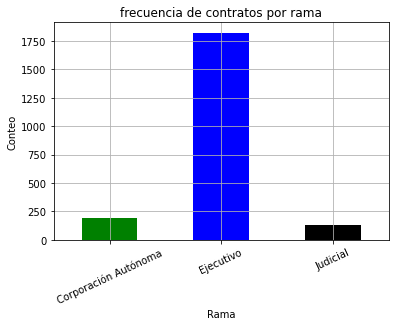

In [17]:
import matplotlib.pyplot as plt

df_principal.groupby('rama')['rama'].count().plot(kind='bar',xlabel="Rama",ylabel='Conteo',grid=True, title='frecuencia de contratos por rama', color=['green','blue','black'])
plt.xticks(rotation=25, horizontalalignment="center")
#https://www.shanelynn.ie/bar-plots-in-python-using-pandas-dataframes/

A continuación se ordena de mayor a menor la frecuencia de contratos por sector, en donde se logra identificar que el sector con menos contratos es el de agricultura y el que más frecuencia tiene es el del sector no aplica, seguido del sector de servicios públicos. Por lo cual se puede pensar que no es muy común que se haga contratación de manera electrónica con comunidades agricolas en el departamento del meta.

In [18]:

df_principal['sector'].value_counts(sort=True)

No aplica/No pertenece              536
Servicio Público                    498
defensa                             247
Ambiente y Desarrollo Sostenible    225
Ley de Justicia                     197
Trabajo                             162
Salud y Protección Social            82
deportes                             67
Educación Nacional                   46
Cultura                              39
Industria                            31
Transporte                           17
agricultura                           7
Name: sector, dtype: int64

En la siguiente línea se grafica la frecuencia de contratos electrónicos por sector del departamento del Meta en un diagrama de barras

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'Ambiente y Desarrollo Sostenible'),
  Text(1, 0, 'Cultura'),
  Text(2, 0, 'Educación Nacional'),
  Text(3, 0, 'Industria'),
  Text(4, 0, 'Ley de Justicia'),
  Text(5, 0, 'No aplica/No pertenece'),
  Text(6, 0, 'Salud y Protección Social'),
  Text(7, 0, 'Servicio Público'),
  Text(8, 0, 'Trabajo'),
  Text(9, 0, 'Transporte'),
  Text(10, 0, 'agricultura'),
  Text(11, 0, 'defensa'),
  Text(12, 0, 'deportes')])

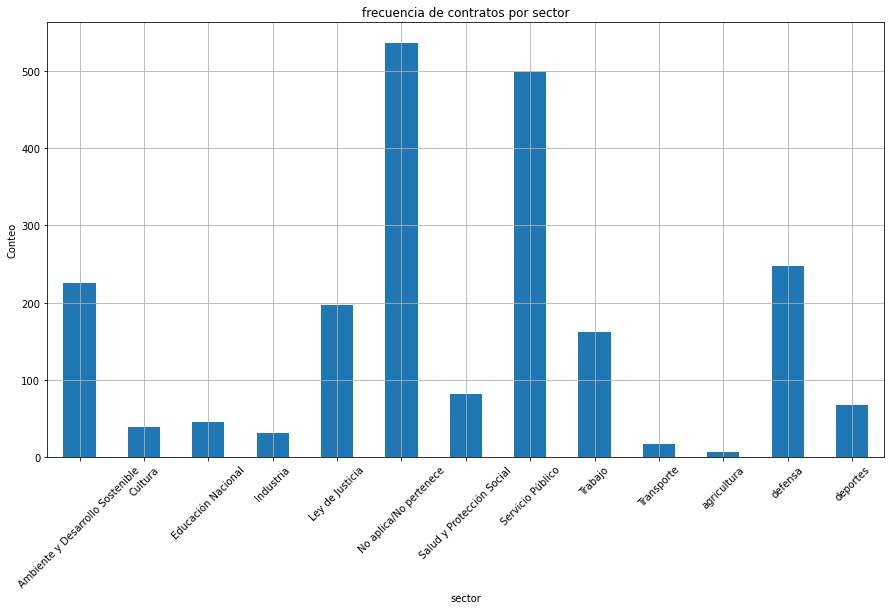

In [19]:
df_principal.groupby('sector')['sector'].count().plot(kind='bar',xlabel="sector",ylabel='Conteo',grid=True, title='frecuencia de contratos por sector',figsize=(15,8))
plt.xticks(rotation=45, horizontalalignment="center")
#https://www.shanelynn.ie/bar-plots-in-python-using-pa

En la siguiente línea se agrupan los valores de valor de contrato por sector

In [20]:
df_dg_torta=df_principal.groupby(['sector'],as_index=False)['valor_del_contrato'].sum()
df_dg_torta=pd.DataFrame(df_dg_torta)

En la siguiente línea se grafica un diagrama de torta en donde se muestran los porcentajes de los valores de contrato por sector, en donde se destaca el menor porcentaje perteneciente al sector de agricultura.

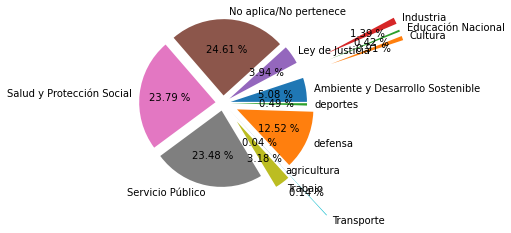

In [21]:
desfase = (0.1,1.5,1.5,1.5,0.1,0.1,0.1,0.1,0.3,1,0.1,0.2, 0.1)
plt.pie(df_dg_torta['valor_del_contrato'], labels=df_dg_torta['sector'], autopct="%0.2f %%",center=(0, 0),explode=desfase)
plt.axis("equal")
plt.show()

#colores = ["#EE6055","#60D394","#AAF683","#FFD97D","#FF9B85"]
#poner parametro dentro plt.pie colors=colores


Con el siguiente bloque de Código se hace una gráfica de barras del porcentaje de frecuencia de contratos electrónicos en el departamento del Meta por sector, en donde se destaca la agricultura por ser el sector con menos cantidad de contratos con un 0.33% y el sector No aplica por ser el que mayor cantidad de contratos tiene en el departamento del Meta con un 25.07%.

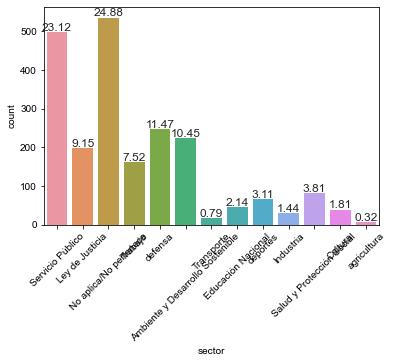

In [24]:
total = len(df_principal['sector'])
ax = sns.countplot(x="sector", data=df_principal) # for Seaborn version 0.7 and more
#ax.set(ylim=(0,1400))
plt.xticks(rotation=45, horizontalalignment="center")
sns.set(rc={'figure.figsize':(20,8.27)})
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 

En la siguiente línea se ordena de mayor a menor la frecuencia de contratos por ciudad del departamento del meta, en donde se logra identificar que hay una diferencia muy grande entre la contratación en la ciudad de Villavicencio con 1515 contratos seguido de tipo de ciudad no definido con 436 contratos y acacias con 124 contratos. De lo que se puede inferir que la ciudad principal se lleva la gran mayoría de contratos electrónicos y que las ciudades que no son principales tienden a tener menos importancia en la contratación electrónica 

In [25]:
ciudad_frec=df_principal['ciudad'].value_counts(sort=True)
ciudad_frec

Villavicencio    1513
No Definido       435
Acacías           123
Puerto López       42
Cumaral            32
Restrepo            7
Granada             2
Name: ciudad, dtype: int64

A continuación, se observa la grafica de frecuencia de contratos por ciudad en el departamento del meta 

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Acacías'),
  Text(1, 0, 'Cumaral'),
  Text(2, 0, 'Granada'),
  Text(3, 0, 'No Definido'),
  Text(4, 0, 'Puerto López'),
  Text(5, 0, 'Restrepo'),
  Text(6, 0, 'Villavicencio')])

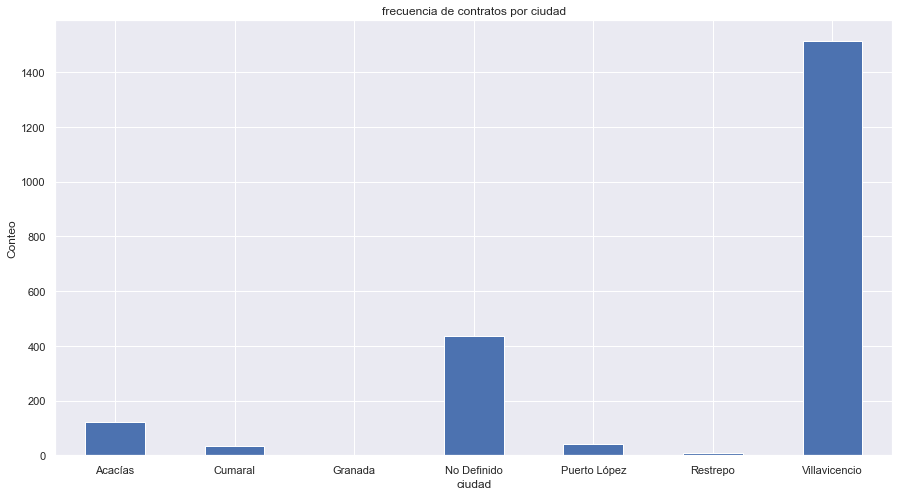

In [26]:
df_principal.groupby('ciudad')['ciudad'].count().plot(kind='bar',xlabel="ciudad",ylabel='Conteo',grid=True, title='frecuencia de contratos por ciudad',figsize=(15,8))
plt.xticks(rotation=0, horizontalalignment="center")
#https://www.shanelynn.ie/bar-plots-in-python-using-pa

En el siguiente bloque de Código se crea un dataframe que agrupa el valor de los contratos electrónicos por cada ciudad, en donde se destaca a Villavicencio como la ciudad con contratos de mayor valor en los últimos 5 años con un total de 86,091,693,687 COP seguida de las categoría de ciudad No Definida con 42,588,929,791 COP.

In [27]:
df_dg_ciudad=df_principal.groupby(['ciudad'],as_index=False,sort= True)['valor_del_contrato'].sum()
df_dg_ciudad

,ciudad,valor_del_contrato
0,Acacías,5033040537
1,Cumaral,396701126
2,Granada,36332914
3,No Definido,43843713574
4,Puerto López,5538430263
5,Restrepo,139634597
6,Villavicencio,89271040266


El siguiente de bloque de código grafica el valor total de los contratos electrónicos en los últimos 5 años en cada una de las ciudades del departamento del Meta. 

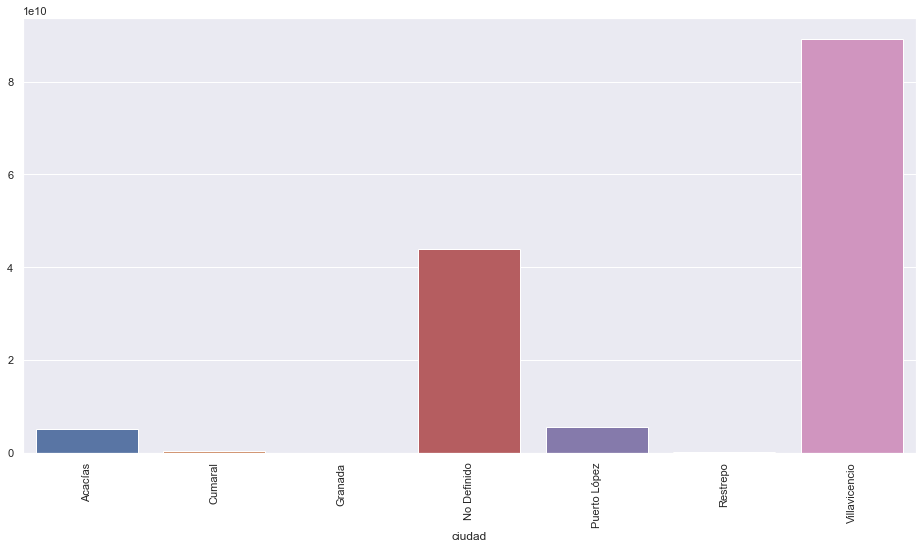

In [31]:
fig, df_dg_ciudad = plt.subplots(figsize=(16,8))
df_dg_ciudad=sns.barplot(y=df_principal.groupby(by='ciudad').sum()['valor_del_contrato'].values,x=df_principal.groupby(by='ciudad').sum()['valor_del_contrato'].index)
df_dg_ciudad.set_xticklabels(df_dg_ciudad.get_xticklabels(), rotation=90);


En el siguiente bloque de Código se hace una gráfica de frecuencia de contratación electrónica en el departamento del huila por rama y por cada una de las ciudades, en donde sobresale la ciudad de Villavicencio y en esta la rama ejecutiva muy por encima de las otras ramas, seguida de la ciudad No definida en donde también sobresale la rama ejecutiva, por otra parte se puede observar que en acacias los contratos electrónicos son mayormente de la rama judicial y que en Granada y restrepo hay tan pocos contratos que no se aprecian muy bien en la gráfica.

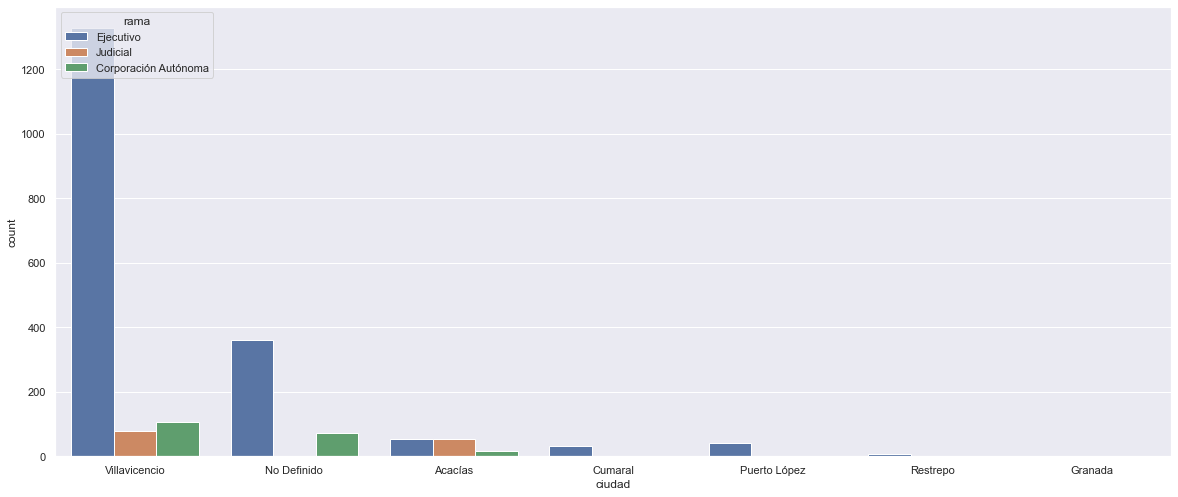

In [32]:
ax = sns.countplot(x="ciudad", hue="rama", data=df_principal) # for Seaborn version 0.7 and more
plt.rcParams['figure.figsize'] = (10, 10)

### Histogramas 

El siguiente bloque de Código crea una serie de histogramas del valor en los contratos electrónicos por cada rama en las diferentes ciudades del departamento del Meta, del que se puede inferir que los contratos electrónicos de mayor valor pertenecen a la rama ejecutiva y se encuentran en la ciudad de Villavicencio, así se puede ver un sesgo a la derecha es decir que hay pocos contratos con valores muy altos.

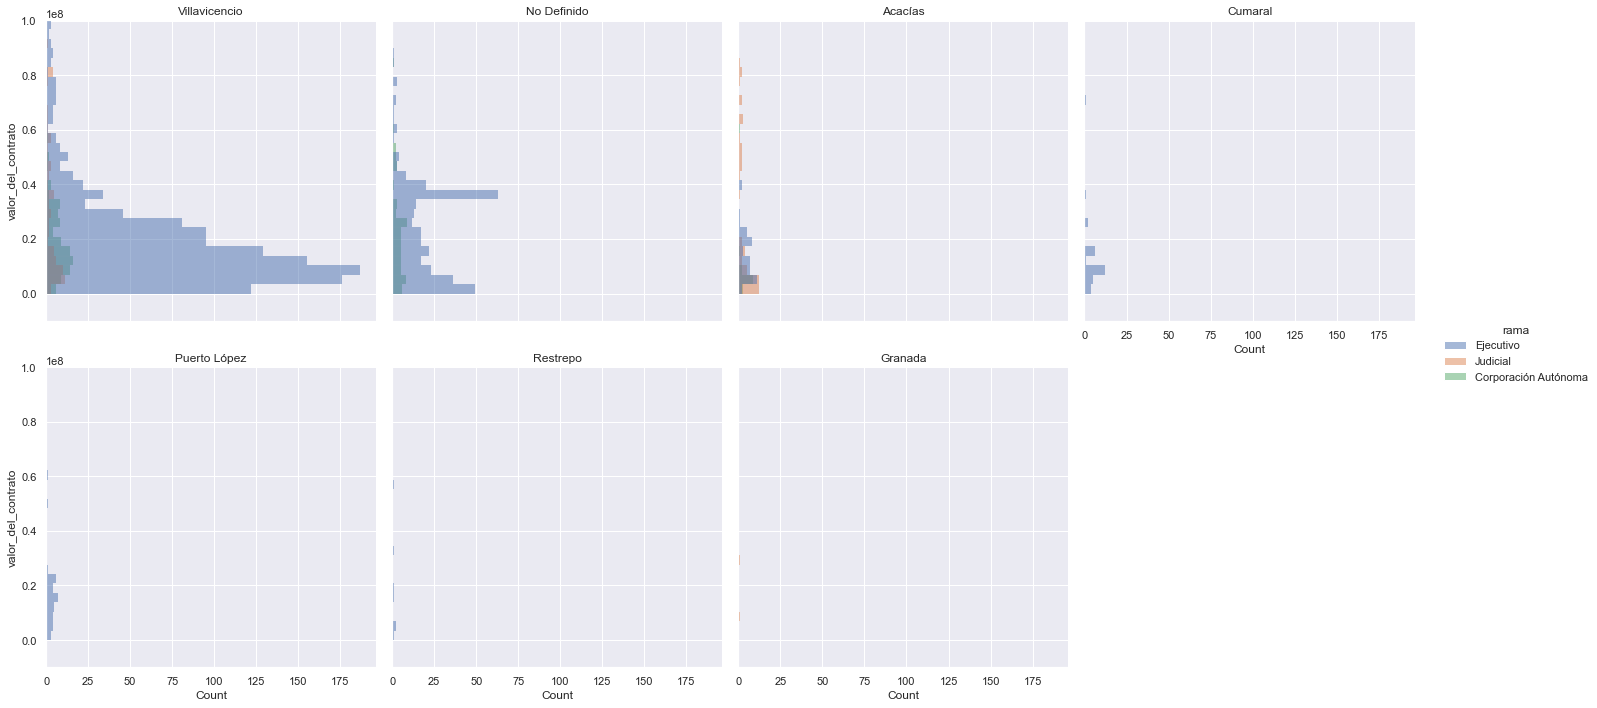

In [33]:
g = sns.displot(
    data=df_principal, y="valor_del_contrato", hue="rama", col="ciudad",col_wrap=4)
g.set_titles("{col_name}",fontsize='22')
g.set(ylim=(-1e7,1e8))

### Series de tiempo 

En la siguiente línea de código se hace una suma por mes de los contratos electrónicos de noviembre de 2017 a dciembre de 2021

In [34]:
df_principal["fecha_de_firma"]= pd.to_datetime(df_principal["fecha_de_firma"])
monthly_summary = df_principal.resample('M', on='fecha_de_firma').sum()

In [35]:
monthly_summary

,valor_del_contrato
fecha_de_firma,
2017-11-30,77840075
2017-12-31,222922044
2018-01-31,708646687
2018-02-28,609274708
2018-03-31,392638091
2018-04-30,809754772
2018-05-31,1322045416
2018-06-30,175213569
2018-07-31,330249493


A continuación se gráfica una serie de tiempo de los contratos electrónicos en la ciudad de Villavicencio de noviembre de 2017 a diciembre de 2021, en donde se resalta el mes de noviembre de 2021 como el mes con el mayor valor de contratos electrónicos.

<AxesSubplot:xlabel='fecha_de_firma'>

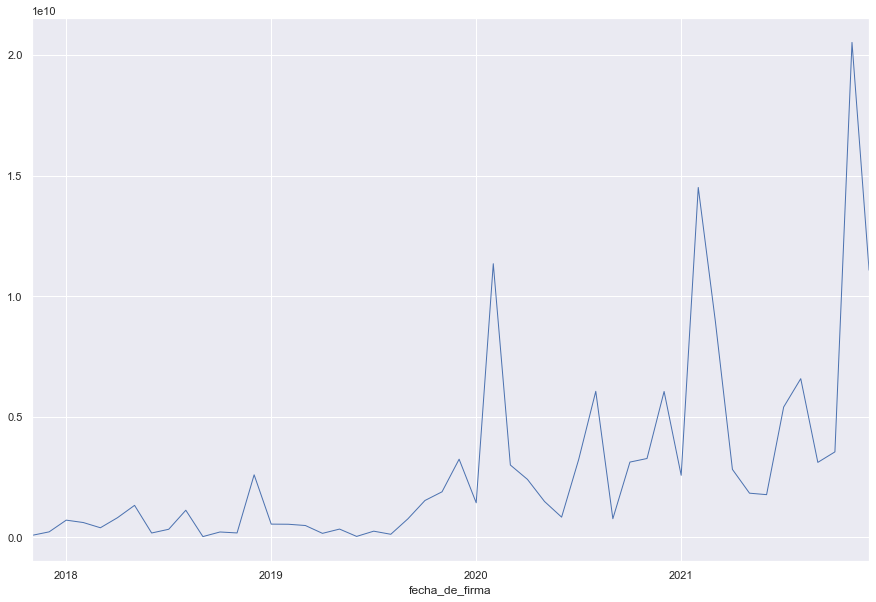

In [36]:
monthly_summary['valor_del_contrato'].plot(linewidth=1,figsize=(15,10))

El siguiente código gráfica una serie de tiempo de las fechas de firma de contrato y el valor de contrato en cada una de las ciudades del departamento del Meta. De acuerdo con la gráfica el departamento con los contratos de más alto valor es el del meta se destaca en donde el periodo con mayor valor de contratación es el primer trimestre de 2021, cabe resaltar que para las ciudades no definidas el 2020 fue un año de contratos con bastante valor superando el valor de los contratos del 2020.

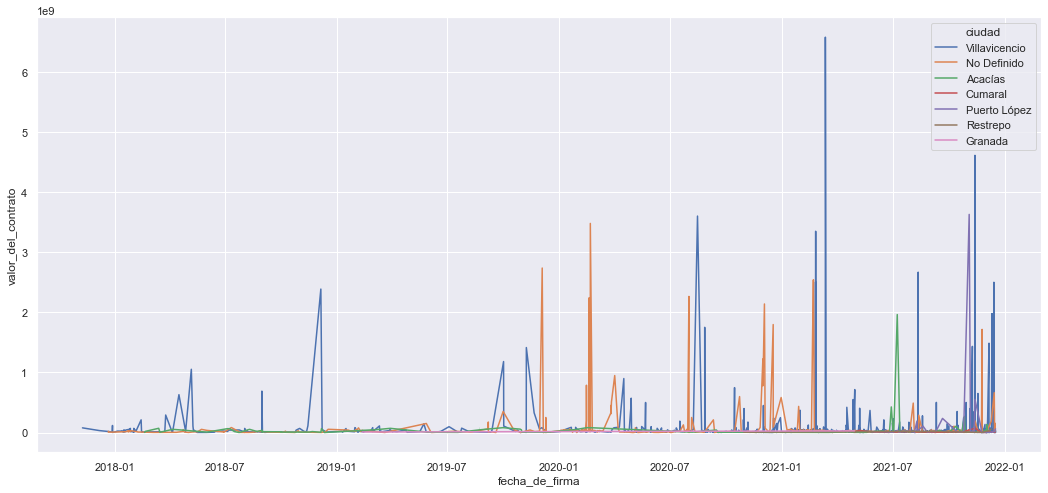

In [37]:
plt.figure(figsize=(18, 8))
sns.lineplot(x="fecha_de_firma", y="valor_del_contrato",
             hue="ciudad", 
             data=df_principal)
g.set_titles("{col_name}",fontsize='22')
g.set(ylim=(-1e7,1e8))


A continuación, se crean diferentes series de tiempo de las fechas de firma de contratos y los valores de contratos en cada rama por cada una de las ciudades del departamento del Meta.

No Definido: posterior a agosto del 2019 el valor total de los contratos de la rama ejecutiva comienza a crecer llegando a superar los tres billones de pesos (COP), cabe resaltar que en los últimos tres años la rama ejecutiva a superado ampliamente el valor de los contratos de la corporación autónoma.

Villavicencio: el valor de la contratación en la rama ejecutiva en Villavicencio se ha incrementado significativamente en los últimos tres años, llegando a superar los 6 billones de pesos (COP) en el primer semestre de 2021. además se destaca el incremento del valor de la contratación electrónica en la rama de corporación autónoma en el segundo semestre del 2021, llegando a superar los 2 billones de pesos (COP).

Acacias: En esta ciudad se logra identificar que antes del mes de julio del 2021 el precio de los contratos estaba por debajo del billón de pesos, posterior a esta fecha se hace contratación en la rama ejecutiva por un valor total de contratos de esta rama que llega a los 2 billones de pesos aproximadamente.

Cumaral: en esta ciudad solo se han hecho contratos electrónicos en la rama ejecutiva en el año 2021 por muy poco valor.


Puerto López: en esta ciudad solo se han hecho contratos electrónicos en la rama judicial en el 2021 los cuales pueden llegar a superar 3 billones de pesos (COP).

Granada: el valor y la cantidad de contratos electrónicos en esta ciudad es tan bajo que no se logra ver en la serie de tiempo.

Restrepo: En esta ciudad únicamente se tienen contratos electrónicos de la rama ejecutiva con muy bajo valor.





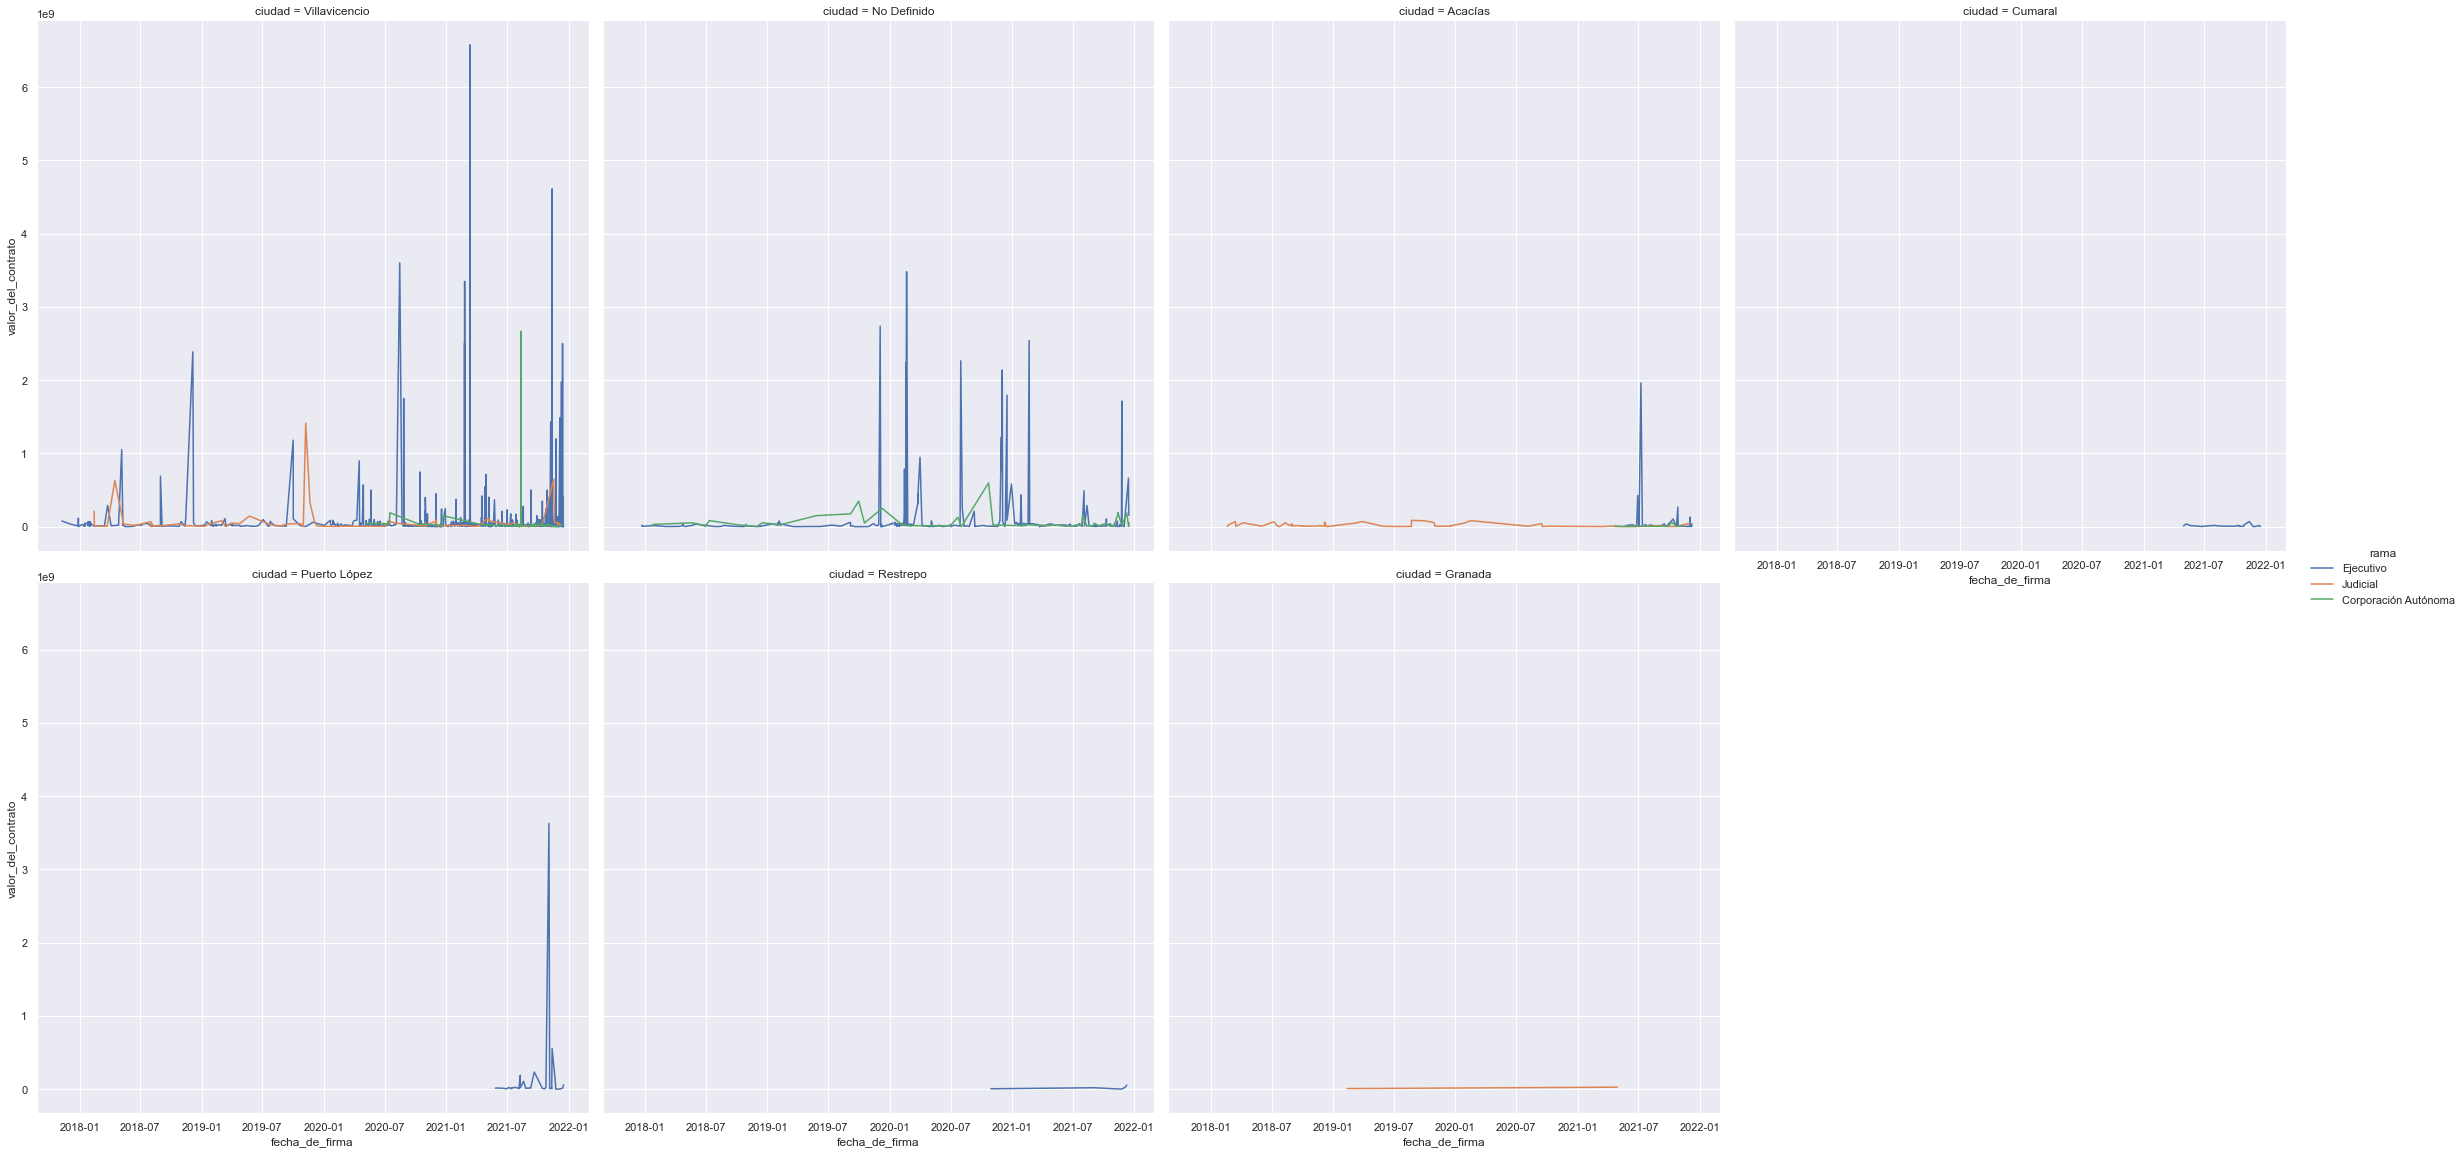

In [38]:
ax=sns.relplot(x="fecha_de_firma", y="valor_del_contrato", 
            height=8,hue='rama',col='ciudad', 
            kind="line", estimator=None, data=df_principal,legend='auto',
            col_wrap=4)

### Conclusiones

Depues de hacer el análisis exploratorio pudimos concluir lo siguient:

1. La ciudad de villabicencio es la que tiene la mayor parte de la contratación a nivel departamental con 1515.
2. La rama ejecutiva es la que más tiene firmas de contratos con 1822.
3. El sector salud y protección social es el que más contratación tiene a nivel departamental con un 23.7%, no obstante los sectores no definidos (No pertenece) tienen 23.5%.
4. En el departamento del Meta se ha ido aumentando el presupuesto a medida que pasa el tiempo en los ultimos 5 años.
5. Los sectores de educación, cultura y deporte son los que menos contratación tienen en el departamento del Meta.
6. En la ciudad de villavicencio se invierte mayormente en contratos de la rama ejecutiva y la inversion en la rama judicial es mínima.
7. Noviembre de 2021 fue el mes con el mayor valor de contratos firmados a nivel departamental con 16,381,032,982 COP 
8. El mes con menor presupuesto en contratos fue Noviembre del 2017 con un valor de 77,840,075 COP.

